In [4]:
# Import necessary libraries
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Mount Google Drive
drive.mount('/content/drive')

# File path on Google Drive
file_path = '/content/drive/My Drive/Bird Detection DSGP/Bird migration dataset.csv'  # Replace with your file path

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display all columns horizontally and show only the first 10 rows
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping of columns

# Display the first 10 rows
print(df.head(10))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ID  Migratory route codes    Migration nodes      Bird orders Bird families Bird genera English Name       Bird species Species Authority Migration type The IUCN Red List (2023)  Migration start year  Migration start month  Migration end year  Migration end month Sensor types  Continents (1 = North America, 2 = South America, 3 = Europe, 4 = Africa, 5 = Asia, 6 = Oceania)      Countries   Provinces      GPS_xx     GPS_yy  Migration patterns (1 = Intercontinental migration, 2 = Intracontinental migration)  Migration routes (1 = North America↔North America, 2 = South America↔South America, 3 = Europe↔Europe, 4 = Africa↔Africa, 5 = Asia↔Asia, 6 = Oceania↔Oceania, 7 = Europe→Africa, 8 = Africa→Europe, 9 = North America→South America, 10 = South America→North America, 11 = Europe→Asia, 12 = Asia→Europe, 13 = Asia→Africa, 14 = Africa→Asia, 15 = Europe→North Amer

In [5]:
# Standardize column names by replacing spaces and special characters with underscores
df.columns = df.columns.str.replace(' ', '_').str.replace('[^A-Za-z0-9_]+', '', regex=True)

# Display corrected column names to verify changes
print("Updated column names: ", df.columns.tolist())

# Check unique values in 'Migration_type' after fixing column names
if 'Migration_type' in df.columns:
    print(df['Migration_type'].value_counts())
else:
    print("Column 'Migration_type' not found!")

# Dynamically fix column naming issues for 'Migration_routes'
for col in df.columns:
    if 'Migration_routes' in col:
        df.rename(columns={col: 'Migration_routes'}, inplace=True)

# Verify if renaming was successful
print("Final column names:", df.columns.tolist())

Updated column names:  ['ID', 'Migratory_route_codes', 'Migration_nodes', 'Bird_orders', 'Bird_families', 'Bird_genera', 'English_Name', 'Bird_species', 'Species_Authority', 'Migration_type', 'The_IUCN_Red_List_2023', 'Migration_start_year', 'Migration_start_month', 'Migration_end_year', 'Migration_end_month', 'Sensor_types', 'Continents_1__North_America_2__South_America_3__Europe_4__Africa_5__Asia_6__Oceania', 'Countries', 'Provinces', 'GPS_xx', 'GPS_yy', 'Migration_patterns_1__Intercontinental_migration_2__Intracontinental_migration', 'Migration_routes_1__North_AmericaNorth_America_2__South_AmericaSouth_America_3__EuropeEurope_4__AfricaAfrica_5__AsiaAsia_6__OceaniaOceania_7__EuropeAfrica_8__AfricaEurope_9__North_AmericaSouth_America_10__South_AmericaNorth_America_11__EuropeAsia_12__AsiaEurope_13__AsiaAfrica_14__AfricaAsia_15__EuropeNorth_America_16__North_AmericaEurope_17__AsiaOceania_18__OceaniaAsia_19__North_AmericaOceania_20__OceaniaNorth_America_21__North_AmericaAsia', 'Reference

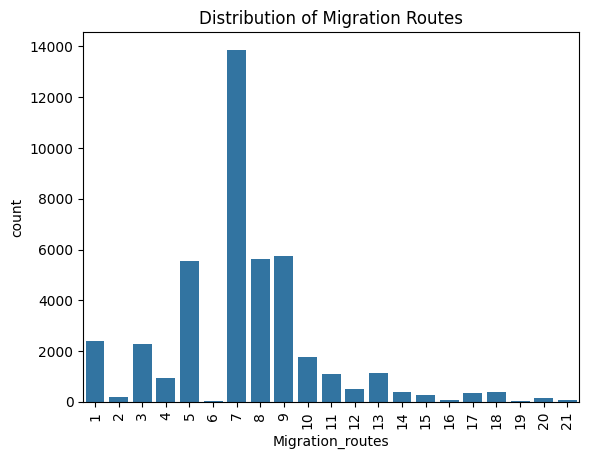

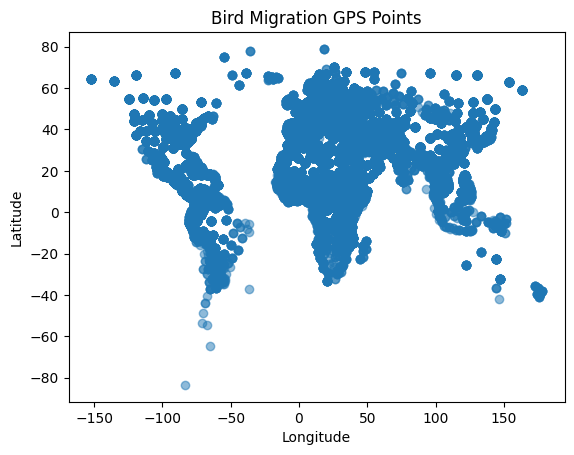

In [6]:
# Plot migration routes if column exists
if 'Migration_routes' in df.columns:
    sns.countplot(data=df, x='Migration_routes')
    plt.title('Distribution of Migration Routes')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Column 'Migration_routes' not found for plotting.")

# Scatter plot for GPS coordinates if columns exist
if 'GPS_xx' in df.columns and 'GPS_yy' in df.columns:
    plt.scatter(df['GPS_xx'], df['GPS_yy'], alpha=0.5)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Bird Migration GPS Points')
    plt.show()
else:
    print("GPS columns not found!")

In [7]:
import pandas as pd
# Fix column name issues related to 'Migration patterns'
for col in df.columns:
    if 'Migration' in col and 'pattern' in col.lower():
        df.rename(columns={col: 'Migration_patterns'}, inplace=True)

# Verify changes after renaming
print("Updated column names:", df.columns.tolist())

# Convert Migration_patterns into binary classification (1 for Intercontinental, 0 for Intracontinental)
df['Bird_presence'] = df['Migration_patterns'].apply(lambda x: 1 if x == 1 else 0)

# Selecting features and target variable
required_columns = ['Migration_start_year', 'Migration_start_month', 'GPS_xx', 'GPS_yy']

# Ensure all required columns exist in the DataFrame
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    print(f"Missing columns: {missing_cols}")
else:
    X = df[required_columns]
    y = df['Bird_presence']  # Using the new binary target variable

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = rf_model.predict(X_test)
    print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Save the model for fine-tuning later
    import joblib
    joblib.dump(rf_model, '/content/drive/My Drive/Bird Detection DSGP/rf_model.pkl')
    print("Model saved for future fine-tuning.")


Updated column names: ['ID', 'Migratory_route_codes', 'Migration_nodes', 'Bird_orders', 'Bird_families', 'Bird_genera', 'English_Name', 'Bird_species', 'Species_Authority', 'Migration_type', 'The_IUCN_Red_List_2023', 'Migration_start_year', 'Migration_start_month', 'Migration_end_year', 'Migration_end_month', 'Sensor_types', 'Continents_1__North_America_2__South_America_3__Europe_4__Africa_5__Asia_6__Oceania', 'Countries', 'Provinces', 'GPS_xx', 'GPS_yy', 'Migration_patterns', 'Migration_routes', 'References', 'Publish_time', 'DOI']
Random Forest Accuracy: 0.9328976543353951
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      2366
           1       0.94      0.97      0.95      6203

    accuracy                           0.93      8569
   macro avg       0.92      0.91      0.91      8569
weighted avg       0.93      0.93      0.93      8569

Model saved for future fine-tuning.


In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Load the dataset (ensure correct file path)
df = pd.read_csv('/content/drive/My Drive/Bird Detection DSGP/Bird migration dataset.csv')

# Standardize column names
df.columns = df.columns.str.replace(' ', '_').str.strip()

# Select features and target
features = ['Migration_start_year', 'Migration_start_month', 'GPS_xx', 'GPS_yy']
X = df[features].values
y = df['Migration_patterns'].values  # Ensure this is the correct target column

# Convert target variable to binary (0 or 1)
y = (y == 1).astype(int)  # 1 = Intercontinental Migration, 0 = Otherwise

# Reshape X for LSTM (samples, time steps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X.shape[2])),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
accuracy = model.evaluate(X_test, y_test)[1]
print("LSTM Model Accuracy:", accuracy)


KeyError: 'Migration_patterns'